In [758]:
# Importing necessary libraries and tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Dataloading

In [759]:
# Reading data using pandas library
bike=pd.read_csv('/kaggle/input/bikesharing/day.csv')
# Checking the top 5 rows of the dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [760]:
# checking the number of rows and columns
bike.shape

(730, 16)

In [761]:
# Check for null values and data type
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [762]:
# checking the statstical summary od numerical features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning

In [763]:
# droping redundant columns
bike.drop('instant',axis=1,inplace=True)

In [764]:

bike.shape

(730, 15)

In [765]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [766]:
bike.drop('dteday',axis=1,inplace=True)

In [767]:
# Renaming columns for better readability
bike.rename(columns = {'dteday':'date','yr':'year','mnth':'month','atemp':'feeltemp','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [768]:
# Mapping variables 'season', 'month', 'weathersit', 'weekday' for visualization purpose
bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['month']=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['weathersit']=bike.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

In [769]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feeltemp,humidity,windspeed,casual,registered,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Visualization

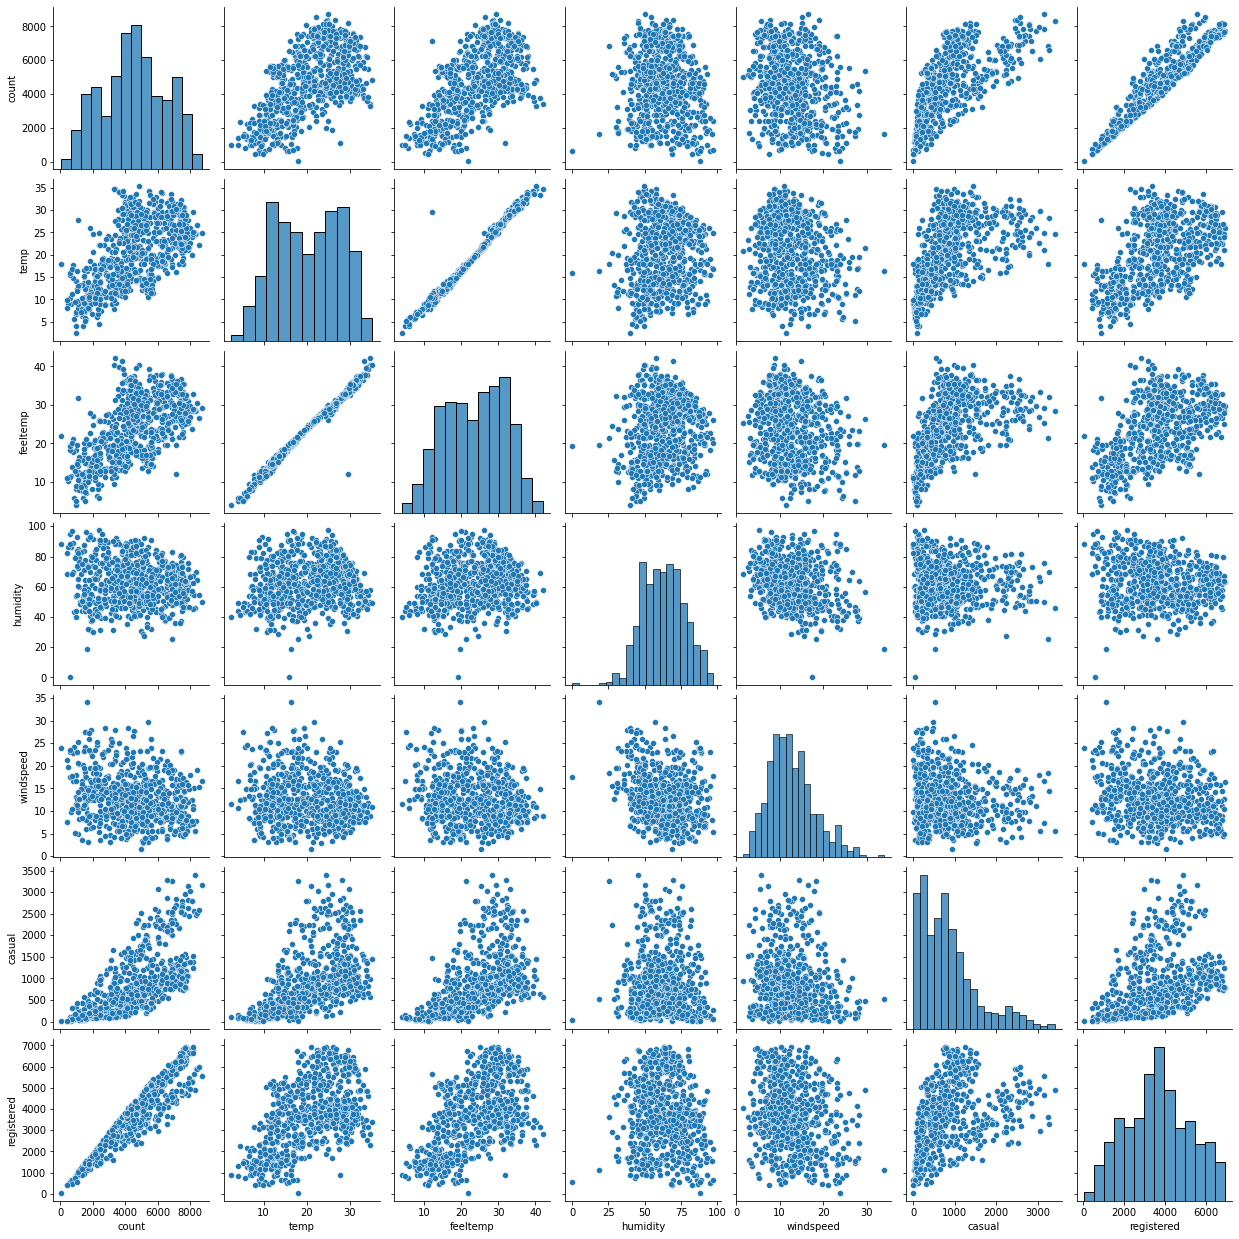

In [770]:
# Pairplot for numeric variables
sns.pairplot(data=bike, vars=['count','temp','feeltemp','humidity','windspeed','casual','registered'])
plt.show()

In [771]:
# lets check the correlation of dependent and independant variables
bike.corr()

,year,holiday,workingday,temp,feeltemp,humidity,windspeed,casual,registered,count
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
feeltemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
count,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

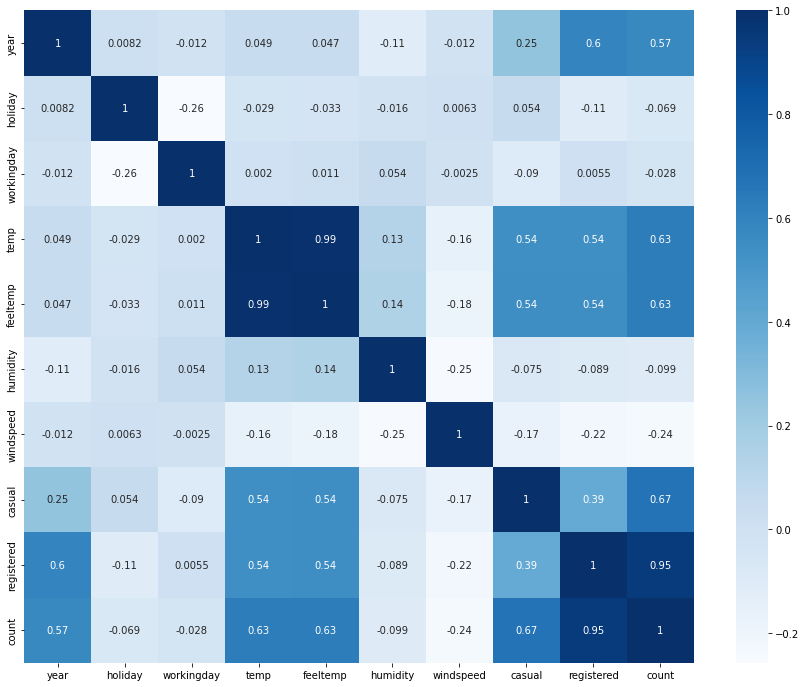

In [772]:
# Heatmap for better understanding
plt.figure(figsize = (15,12))
sns.heatmap(bike.corr(), annot=True,cmap='Blues')

* As shown in heatmap temp, feeltemp, casual, registered variables are positively correlated to target Variable count
* Some other variables are also correlated to target Variable count

**Dropping unnecessary columns**

* date: 
Since there are separate columns for 'year' & 'month' date column is unnecessary.
* casual & registered: 
Both these columns contains the count of bike booked by different categories of customers.From the pairplot as well as the correlation heatmap, it can be conclude that total bike rental value is count = casual + registered. Since our objective is to find the total count of bikes and not by specific category.
* feeltemp: 
 'feeltemp' & 'temp' both are same in a way and also have a high correlation  between they only one can be used.

In [773]:
bike=bike.drop(['casual', 'registered','feeltemp'], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [774]:
# seperating numerical and categorical columns
Cat_cols=['season','year','month','holiday','weekday','workingday','weathersit']
Num_cols=['temp','humidity','windspeed','count']

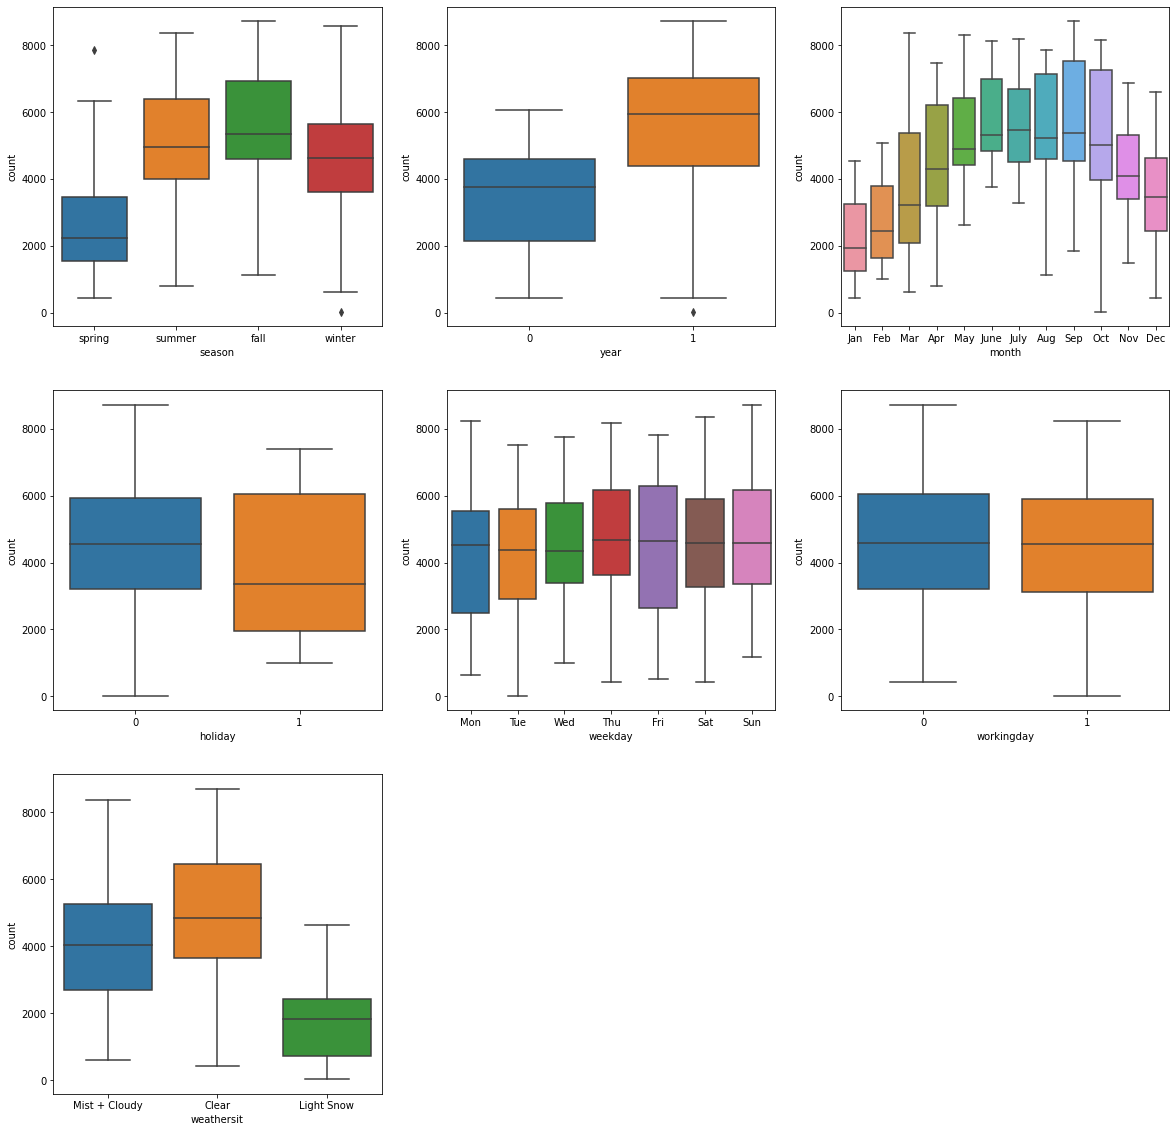

In [775]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(20, 20))
for i in range(len(Cat_cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=bike,x=Cat_cols[i],y=bike["count"])
        

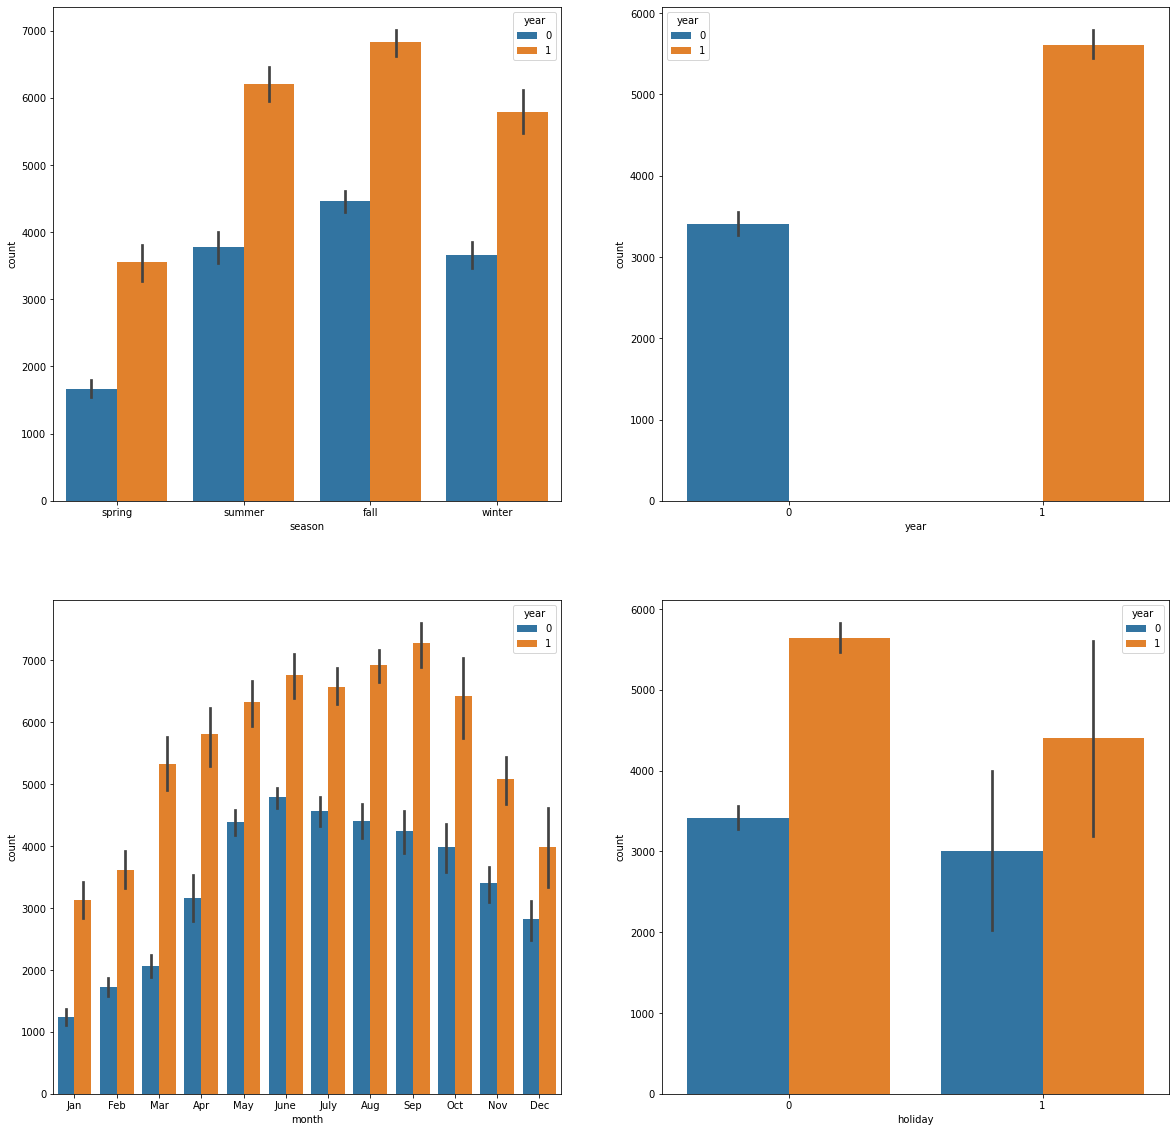

In [776]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(20, 20))
for i in range(len(Num_cols)):
    plt.subplot(2,2,i+1)
    sns.barplot(data=bike,x=Cat_cols[i],y=bike["count"],hue='year')
        

**Insight:
Bike Rented more :**

* During the Fall season and then in summer, that will be from may to oct
* In the year 2019 compared to 2018 (at least 50%)
* In Clear weather
* When non-holiday
* Bike Rented almost same on every day of week and workingday that is between 4000-5000

In [777]:
# Creating dummy variables for 'season', 'month', 'weekday', 'weathersit'
seasons=pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)

In [778]:
# Combining the results to the original bike dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [779]:
# droping the extra columns
bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


<AxesSubplot:>

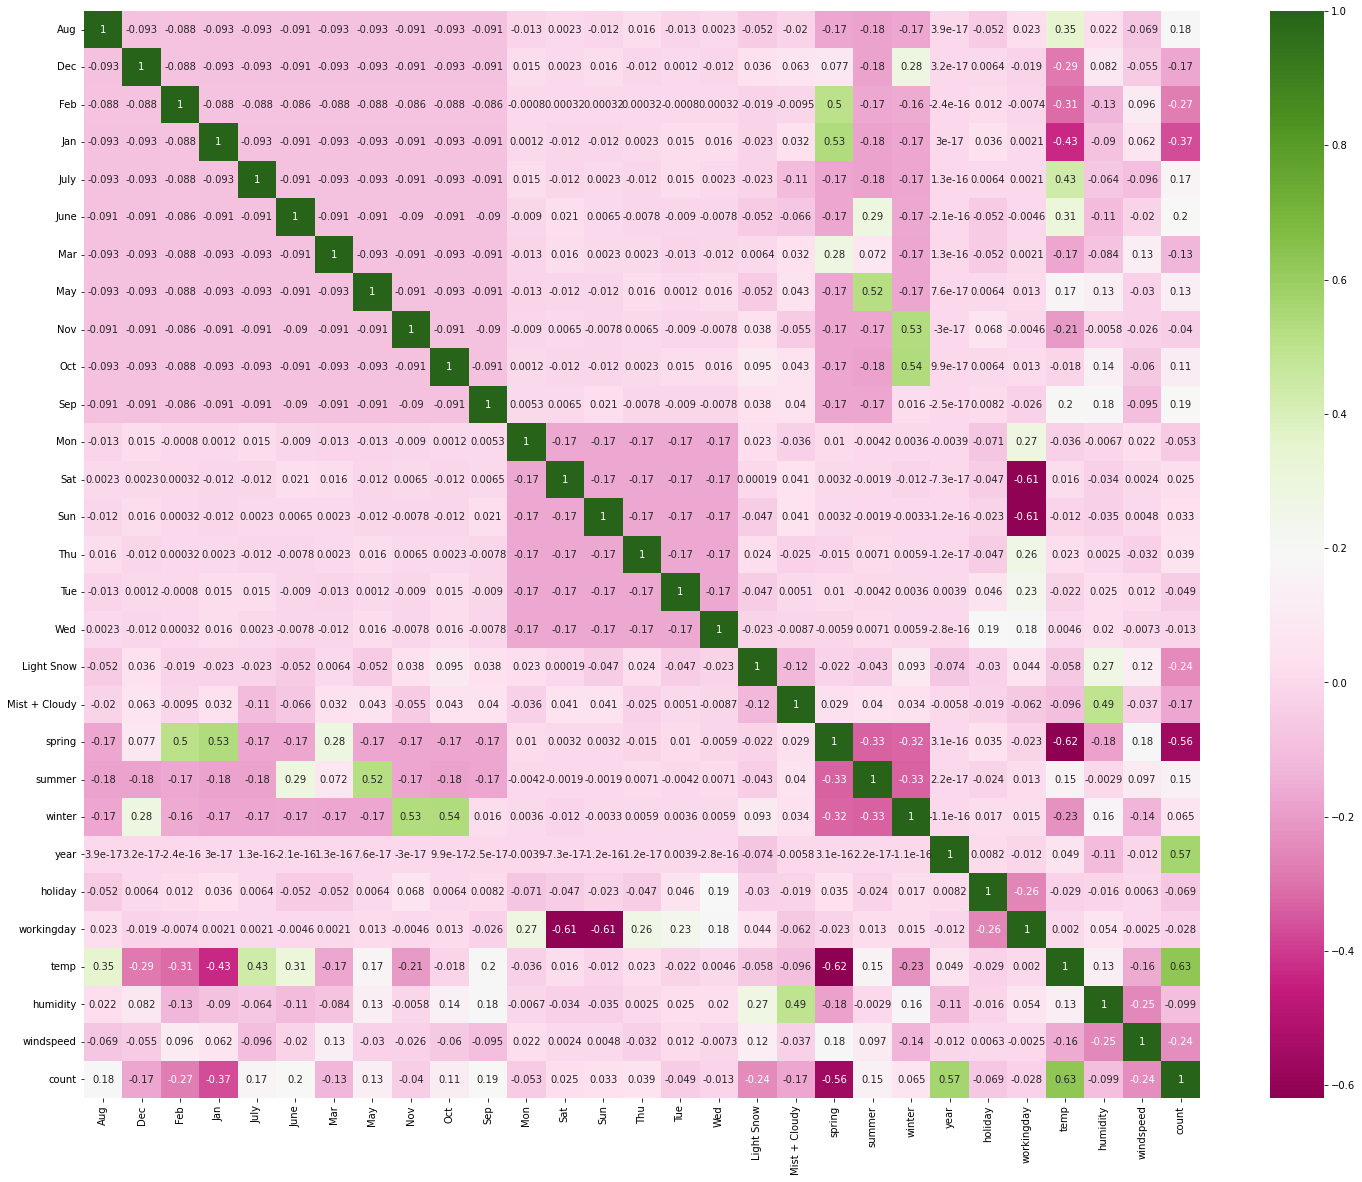

In [780]:
# checking the corr again
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot=True,cmap='PiYG')

In [781]:
# spiliting the data into test and train df
bike_train,bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [782]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


# Rescaling

In [783]:
scaler=MinMaxScaler()

In [784]:
# Apply scaler() to all the numerical columns
bike_train[Num_cols] = scaler.fit_transform(bike_train[Num_cols])

In [785]:
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
653,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


In [786]:
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


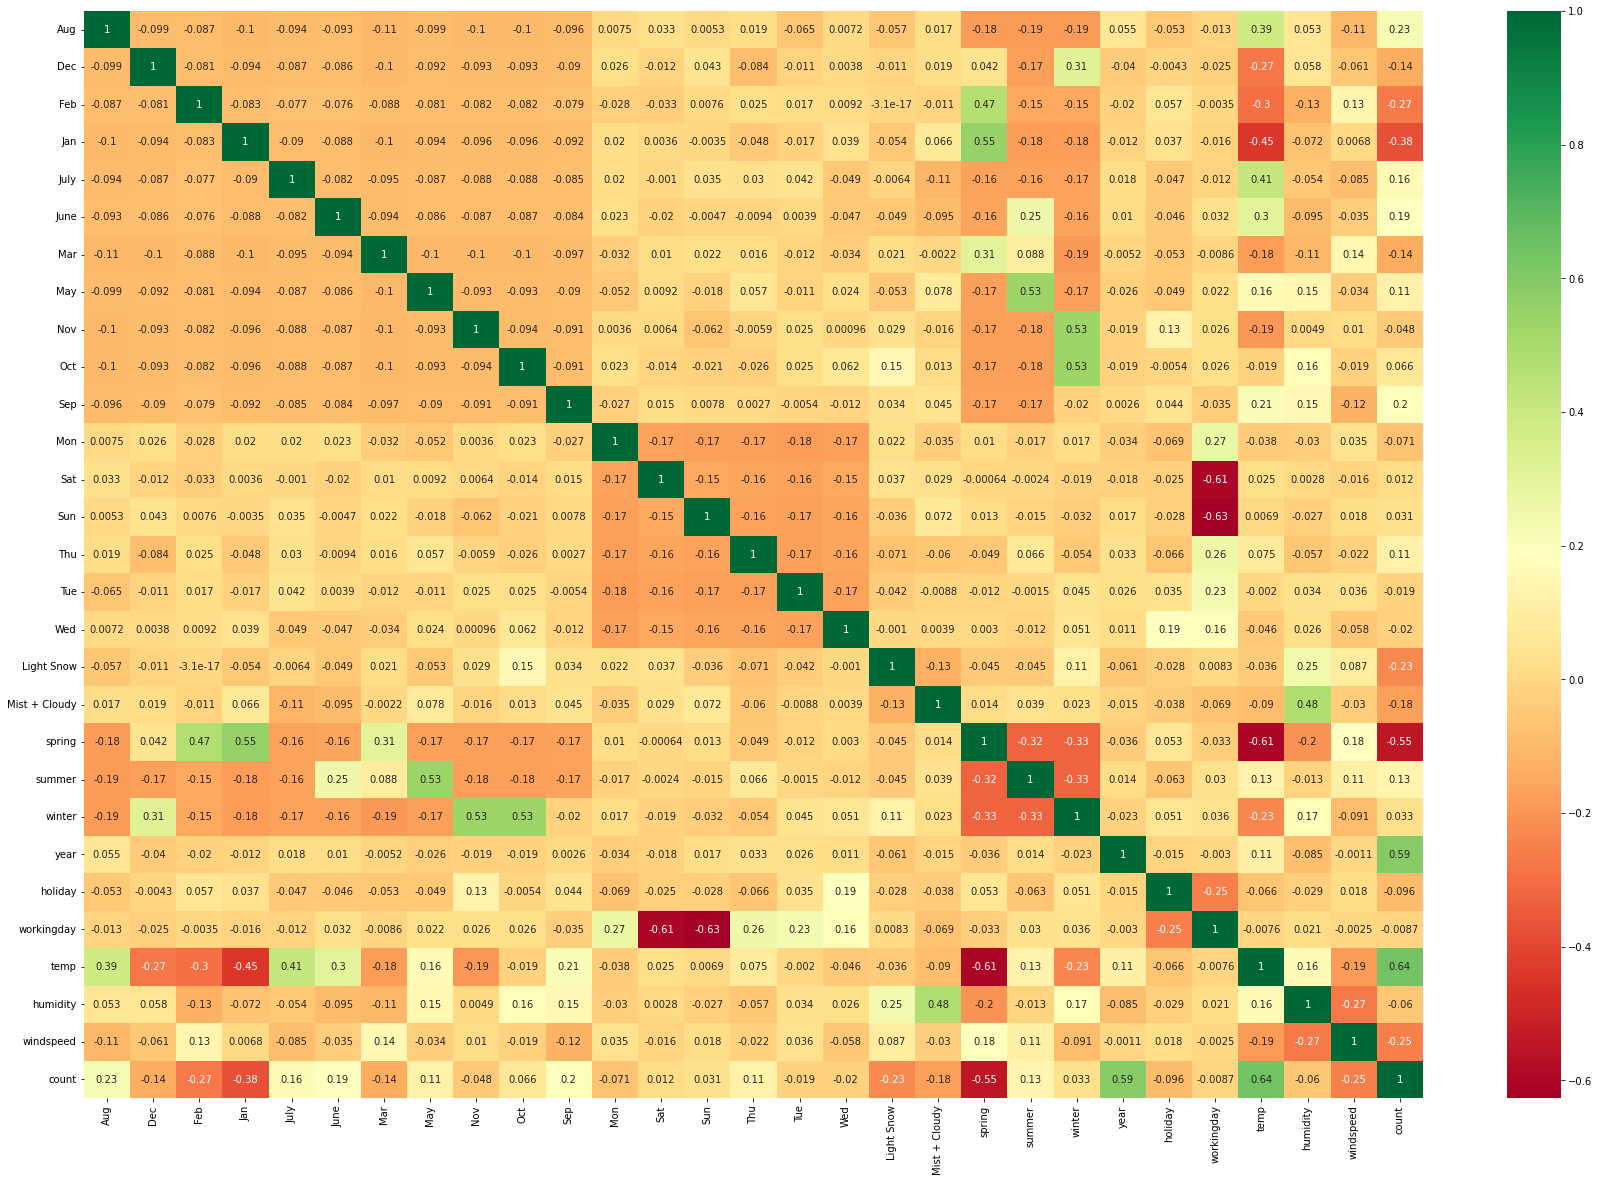

In [787]:
# Checking Correlation Coefficient after scaling

plt.figure(figsize=(30, 20))
sns.heatmap(bike_train.corr(),cmap='RdYlGn',annot = True)
plt.show()

In [788]:
# Divide the data into X and y
y_train=bike_train.pop('count')
X_train=bike_train

# Feature selection using RFE

In [789]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=25)           
rfe = rfe.fit(X_train, y_train)

In [790]:
# Checking which parameters have been selected in that list of 25
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 3),
 ('Mar', False, 4),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [791]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [792]:
# Columns where RFE support is False
X_train.columns[~rfe.support_]


Index(['June', 'Mar', 'Thu'], dtype='object')

In [793]:
#  selecting the Columns where RFE support is True
X_train_new=X_train[col]

In [794]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

# Model 1

In [795]:
# Running a linear regression model
lm1 = sm.OLS(y_train,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.97e-182
Time:                        15:08:44   Log-Likelihood:                 523.77
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3969      0.083      4.781

In [796]:
# checking the vif
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday,55.45
23,humidity,40.12
22,temp,29.80
18,winter,11.54
11,Sun,11.00
10,Sat,10.63
16,spring,10.37
17,summer,8.93
24,windspeed,5.54
6,Nov,5.15


**Looking at the p values and vif some features will not be requried in the analysis. so lets reduce the number of features to 20**

In [797]:
# Selection Features using rfe
rfe = RFE(lm,n_features_to_select=20)           
rfe = rfe.fit(X_train, y_train)

In [798]:
# Checking which parameters have been selected in that list of 20
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 2),
 ('Wed', False, 5),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [799]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'July', 'May', 'Nov', 'Sep', 'Sat', 'Sun',
       'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter', 'year',
       'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [800]:
#  selecting the Columns where RFE support is True
X_train_new=X_train[col]

In [801]:
# Adding constant
X_train_lm = sm.add_constant(X_train_new)

# Model 2

In [802]:
lm2 = sm.OLS(y_train,X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          9.48e-186
Time:                        15:08:44   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3935      0.081      4.850

In [803]:
# Checking Vif
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,workingday,48.84
18,humidity,38.65
17,temp,29.21
8,Sun,9.80
7,Sat,9.41
11,spring,7.09
19,windspeed,5.47
13,winter,4.92
12,summer,4.30
2,Jan,2.55


**Looking at the p values and vif some features will not be requried in the analysis. so lets reduce the number of features to 15**

In [804]:
rfe = RFE(lm,n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

In [805]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [806]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [807]:
# Selecting Columns where RFE support is True
X_train_new=X_train[col]

In [808]:
# adding constant
X_train_lm = sm.add_constant(X_train_new)

# Model 3

In [809]:
lm3 = sm.OLS(y_train,X_train_lm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        15:08:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

In [810]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.94
12,temp,17.80
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
6,Mist + Cloudy,2.32
10,year,2.09
3,Nov,1.83
1,Jan,1.75


* Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

* We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

* We generally droped variables who have high p-values(>0.05) and high VIF(>5) or high p-values and low VIF or high VIF

In [811]:
X_train_new1 = X_train_new.drop(["Dec"], axis = 1)

**Due to high p -value dec is dropped**

# Model 4

In [812]:
X_train_lm = sm.add_constant(X_train_new1)
lm4 = sm.OLS(y_train,X_train_lm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.25e-189
Time:                        15:08:45   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597

In [813]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.12
11,temp,16.80
13,windspeed,4.71
6,spring,4.37
8,winter,3.78
7,summer,2.79
5,Mist + Cloudy,2.29
9,year,2.09
0,Jan,1.67
1,July,1.59


In [814]:
X_train_new2 = X_train_new1.drop(["Nov"], axis = 1)

**Due to high p -value Nov is dropped**

# Model 5

In [815]:
X_train_lm = sm.add_constant(X_train_new2)
lm5 = sm.OLS(y_train,X_train_lm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.45e-190
Time:                        15:08:45   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2957      0.035      8.466

In [816]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,29.05
10,temp,16.70
12,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
4,Mist + Cloudy,2.28
8,year,2.09
0,Jan,1.67
1,July,1.59


In [817]:
X_train_new3 = X_train_new2.drop(["Jan"], axis = 1)

**Due to high p -value Jan is dropped**

# Model 6

In [818]:
X_train_lm = sm.add_constant(X_train_new3)
lm6 = sm.OLS(y_train,X_train_lm).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.69e-190
Time:                        15:08:45   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2841      0.034      8.242

In [819]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.06
9,temp,16.02
11,windspeed,4.65
4,spring,4.01
6,winter,3.35
5,summer,2.78
3,Mist + Cloudy,2.28
7,year,2.08
0,July,1.58
1,Sep,1.38


In [820]:
X_train_new4 = X_train_new3.drop(["humidity"], axis = 1)

**Due to high VIF humidity is dropped**

# Model 7

In [821]:
X_train_lm = sm.add_constant(X_train_new4)
lm7 = sm.OLS(y_train,X_train_lm).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.40e-187
Time:                        15:08:45   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

In [822]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.21
4,spring,2.08
7,year,2.07
6,winter,1.79
0,July,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


In [823]:
X_train_new5 = X_train_new4.drop(["July"], axis = 1)

**July and summer have high correlation with temp and temp being most prominant feature cannot be removed so will remove July due to its low significance**

# Model 8

In [824]:
X_train_lm = sm.add_constant(X_train_new5)
lm8 = sm.OLS(y_train,X_train_lm).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.36e-187
Time:                        15:08:45   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1910      0.030      6.456

In [825]:
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
9,windspeed,4.59
8,temp,3.84
6,year,2.07
3,spring,1.99
4,summer,1.89
5,winter,1.63
2,Mist + Cloudy,1.54
0,Sep,1.23
1,Light Snow,1.08
7,holiday,1.04


**Model 8 is the final model as every feature has low vif and low p-value**

In [840]:
lm8.params

const            0.190994
Sep              0.090932
Light Snow      -0.286002
Mist + Cloudy   -0.080124
spring          -0.055092
summer           0.060987
winter           0.095929
year             0.234060
holiday         -0.096865
temp             0.478177
windspeed       -0.148155
dtype: float64

**count = 0.1264 + (0.0909 x Sep) - (0.2860 x Light Snow) - (0.0801 x Mist + Cloudy) - (0.05509 x spring)+(0.0609 x summer) + (0.959 x winter) + (0.2340 x year) - (0.0968 x holiday) + (0.4781 x temp) - (0.1481 x windspeed)**

# Residual Analysis and Model Validation
**Validating the assumption of Linear Regression Model :**

* Linear Relationship

* Homoscedasticity

* Absence of Multicollinearity

* Independence of residuals

* Normality of Errors

In [826]:
y_train_pred=lm8.predict(X_train_lm)

In [827]:
# residual analysis
res=(y_train-y_train_pred)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

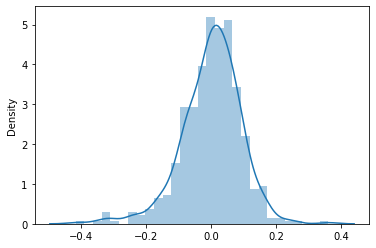

In [828]:
sns.distplot(res)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


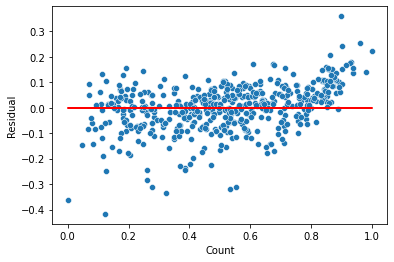

In [841]:
# Homoscedasticity

residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

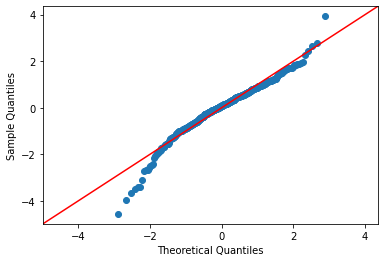

In [843]:
# normality
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [829]:
bike_test[Num_cols] = scaler.transform(bike_test[Num_cols])

In [830]:
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.255708,0.264840,0.232877,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.437258,0.442259,0.423633,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [831]:
# dividing X and y
y_test=bike_test.pop('count')
X_test=bike_test

In [832]:
# adding constant
X_test_new = X_test[X_train_new5.columns]
X_test_bike=sm.add_constant(X_test_new)

In [833]:
# Making predictions

y_test_pred=lm8.predict(X_test_bike)

In [834]:
res=y_test-y_test_pred

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

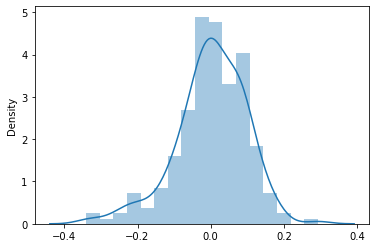

In [835]:
# check for distribution
sns.distplot(res)

In [837]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.833170119099662
0.8035441330582012


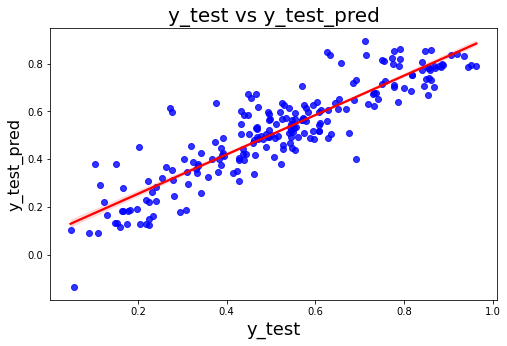

In [838]:
# Plotting y_test and y_pred to understand the spread by using Regression plot
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_test_pred', fontsize=16)                        
plt.show()

In [839]:
# Adjusted R2 Value Calculation for bike_test dataframe
r2 = round(r2_score(y_test, y_test_pred),4)
# n is number of rows in test dataset

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7745

# Summary

* Temperature could be a prime factor for making decision for the Organisation

* We can see demand for bikes was more in 2019 than 2018

* Working days as they have good influence on bike rentals. So it would be great to provide offers to the working individuals

* As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.